# Collect metrics from a log directory

In [105]:
import pandas as pd
from utils_analysis.helpers import collect_metrics

pd.set_option('display.max_columns', 500)
PATH = "logs/H4H-tcvae-normal"
df = collect_metrics(PATH)

In [106]:
tc_bins = [0,1,2,3,4,5,6,7,8,9,10]
tc_labels = [i for i in range(len(tc_bins)-1)]

df['tc_group'] = pd.cut(df['tc'], bins=tc_bins, labels=tc_labels).astype(float)
result = df.loc[
    df.groupby(["version","tc_group"])[['rec']].idxmin().stack()
]

In [107]:
df

,beta,dwkl,epoch,kld,loss,mi,rec,saved,step,tc,version,L,activation,baseline,batch_size,cyclical,cyclical_annealing,dwkl_weight,encoding,latent_dim,lr,mi_weight,mode,mss,num_epochs,num_workers,optimizer,rec_weight,shape,tc_weight,total_steps,tc_group
0,1.388794e-11,0.214528,0,0.021924,tcvae,1.128799,0.973695,1.0,38,0.825197,version_37,3,elu,0,524,True,True,0.1,True,100,0.0001,0,normal,True,500,8,Adam,1,logistic,1,50,0.0
1,3.775133e-11,0.394793,1,0.076653,tcvae,2.653436,0.654706,1.0,77,4.595731,version_37,3,elu,0,524,True,True,0.1,True,100,0.0001,0,normal,True,500,8,Adam,1,logistic,1,50,4.0
2,1.026188e-10,0.215253,2,0.118135,tcvae,3.437290,0.420784,1.0,116,8.218483,version_37,3,elu,0,524,True,True,0.1,True,100,0.0001,0,normal,True,500,8,Adam,1,logistic,1,50,8.0
3,2.789467e-10,0.115489,3,0.173142,tcvae,4.100576,0.367577,0.0,155,13.060981,version_37,3,elu,0,524,True,True,0.1,True,100,0.0001,0,normal,True,500,8,Adam,1,logistic,1,50,NaN
4,7.582563e-10,0.149568,4,0.227874,tcvae,4.763243,0.330163,0.0,194,17.807197,version_37,3,elu,0,524,True,True,0.1,True,100,0.0001,0,normal,True,500,8,Adam,1,logistic,1,50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45920,1.000000e+00,0.032070,495,0.113039,tcvae,5.017254,0.187450,0.0,19343,0.610945,version_8,3,elu,0,524,True,True,1.0,True,50,0.0001,0,normal,True,500,8,Adam,10,logistic,1,50,0.0
45921,1.000000e+00,0.035044,496,0.113023,tcvae,5.008205,0.188054,0.0,19382,0.606247,version_8,3,elu,0,524,True,True,1.0,True,50,0.0001,0,normal,True,500,8,Adam,10,logistic,1,50,0.0
45922,1.000000e+00,0.031580,497,0.113594,tcvae,5.028240,0.187721,0.0,19421,0.605131,version_8,3,elu,0,524,True,True,1.0,True,50,0.0001,0,normal,True,500,8,Adam,10,logistic,1,50,0.0
45923,1.000000e+00,0.028965,498,0.113256,tcvae,5.009119,0.187929,0.0,19460,0.601376,version_8,3,elu,0,524,True,True,1.0,True,50,0.0001,0,normal,True,500,8,Adam,10,logistic,1,50,0.0


# Pareto Front

In [108]:
from paretoset import paretoset

mask = paretoset(result[["tc", "rec"]], sense=["min", "min"])
df_pareto = result[mask]

In [109]:
df_pareto.sort_values("tc")

,beta,dwkl,epoch,kld,loss,mi,rec,saved,step,tc,version,L,activation,baseline,batch_size,cyclical,cyclical_annealing,dwkl_weight,encoding,latent_dim,lr,mi_weight,mode,mss,num_epochs,num_workers,optimizer,rec_weight,shape,tc_weight,total_steps,tc_group
11148,0.119203,0.149858,223,0.110251,tcvae,4.823739,0.205583,1.0,8735,0.521685,version_18,3,elu,0,524,True,True,0.01,True,50,0.0010,0,normal,True,500,8,Adam,1,logistic,1,50,0.0
1423,0.119203,0.060392,423,0.109756,tcvae,4.889723,0.203272,1.0,16535,0.533497,version_29,3,elu,0,524,True,True,1.00,True,50,0.0010,0,normal,True,500,8,Adam,10,logistic,10,50,0.0
8974,1.000000,0.192664,49,0.115723,tcvae,4.988170,0.194172,1.0,1949,0.605680,version_35,3,elu,0,524,True,True,1.00,True,50,0.0010,0,normal,True,500,8,Adam,100,logistic,10,50,0.0
976,0.731058,0.409351,476,0.128957,tcvae,5.254063,0.170238,1.0,18602,0.781725,version_24,3,elu,0,524,True,True,0.01,True,50,0.0010,0,normal,True,500,8,Adam,10,logistic,1,50,0.0
20401,0.731058,0.165136,476,0.127305,tcvae,5.303123,0.166892,1.0,18602,0.897035,version_17,3,elu,0,524,True,True,1.00,True,50,0.0001,0,normal,True,500,8,Adam,100,logistic,10,50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34250,0.500000,0.418126,325,0.156618,tcvae,6.256131,0.040540,1.0,12713,8.982934,version_67,3,elu,0,524,True,True,0.10,True,100,0.0010,0,normal,True,500,8,Adam,100,logistic,1,50,8.0
28850,0.500000,0.145285,425,0.154451,tcvae,6.256092,0.040375,1.0,16613,9.068301,version_68,3,elu,0,524,True,True,1.00,True,100,0.0010,0,normal,True,500,8,Adam,100,logistic,1,50,9.0
32850,0.500000,0.409489,425,0.332516,tcvae,6.257804,0.037813,1.0,16613,9.948631,version_13,3,elu,0,524,True,True,0.10,True,50,0.0001,0,normal,True,500,8,Adam,100,logistic,1,50,9.0
31900,0.500000,0.155850,475,0.109565,tcvae,6.257787,0.037560,1.0,18563,9.975168,version_86,3,elu,0,524,True,True,1.00,True,150,0.0001,0,normal,True,500,8,Adam,100,logistic,1,50,9.0


In [110]:
import matplotlib.pyplot as plt

def create_scatter_plot(df, x_col, y_col, version_col="version"):
    fig, ax = plt.subplots(figsize=(8, 6))
    categories = df[version_col].astype('category')
    scatter = ax.scatter(df[x_col], df[y_col], c=categories.cat.codes, cmap='viridis', alpha=0.7, edgecolor='k')
    legend_labels = categories.cat.categories
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=8)
                      for i in range(len(legend_labels))]
    ax.legend(legend_handles, legend_labels, title=version_col)
    ax.set_title("Scatter Plot")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    return fig

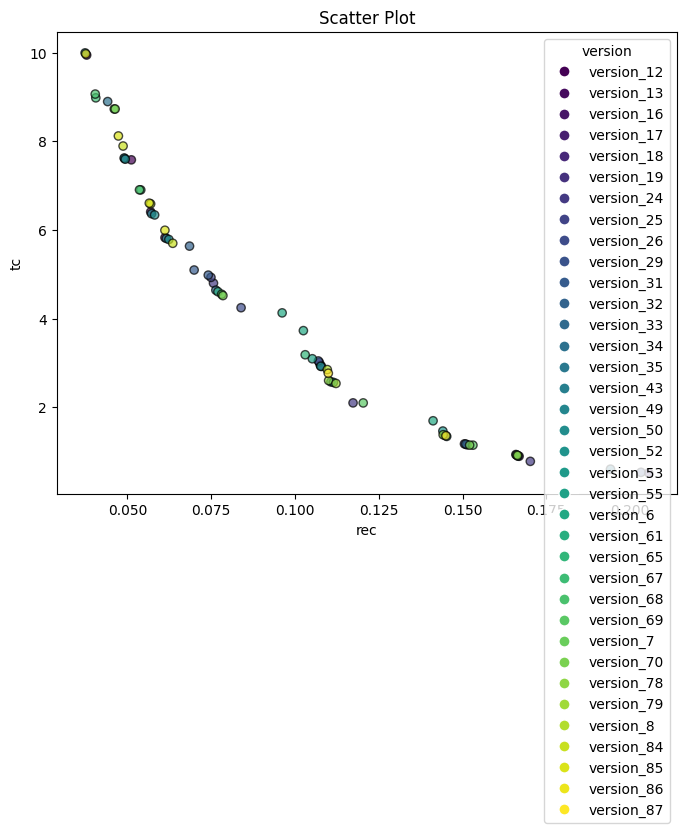

In [111]:
fig = create_scatter_plot(df_pareto, x_col='rec', y_col='tc')

# Model Analysis

In [112]:
import torch
import numpy as np

from utils_analysis.helpers import load_data_and_model

In [113]:
df_pareto.sort_values("rec")

,beta,dwkl,epoch,kld,loss,mi,rec,saved,step,tc,version,L,activation,baseline,batch_size,cyclical,cyclical_annealing,dwkl_weight,encoding,latent_dim,lr,mi_weight,mode,mss,num_epochs,num_workers,optimizer,rec_weight,shape,tc_weight,total_steps,tc_group
22900,0.500000,0.154223,475,0.164031,tcvae,6.257805,0.037342,1.0,18563,9.997423,version_50,3,elu,0,524,True,True,1.00,True,100,0.0001,0,normal,True,500,8,Adam,100,logistic,1,50,9.0
31900,0.500000,0.155850,475,0.109565,tcvae,6.257787,0.037560,1.0,18563,9.975168,version_86,3,elu,0,524,True,True,1.00,True,150,0.0001,0,normal,True,500,8,Adam,100,logistic,1,50,9.0
32850,0.500000,0.409489,425,0.332516,tcvae,6.257804,0.037813,1.0,16613,9.948631,version_13,3,elu,0,524,True,True,0.10,True,50,0.0001,0,normal,True,500,8,Adam,100,logistic,1,50,9.0
28850,0.500000,0.145285,425,0.154451,tcvae,6.256092,0.040375,1.0,16613,9.068301,version_68,3,elu,0,524,True,True,1.00,True,100,0.0010,0,normal,True,500,8,Adam,100,logistic,1,50,9.0
34250,0.500000,0.418126,325,0.156618,tcvae,6.256131,0.040540,1.0,12713,8.982934,version_67,3,elu,0,524,True,True,0.10,True,100,0.0010,0,normal,True,500,8,Adam,100,logistic,1,50,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20401,0.731058,0.165136,476,0.127305,tcvae,5.303123,0.166892,1.0,18602,0.897035,version_17,3,elu,0,524,True,True,1.00,True,50,0.0001,0,normal,True,500,8,Adam,100,logistic,10,50,0.0
976,0.731058,0.409351,476,0.128957,tcvae,5.254063,0.170238,1.0,18602,0.781725,version_24,3,elu,0,524,True,True,0.01,True,50,0.0010,0,normal,True,500,8,Adam,10,logistic,1,50,0.0
8974,1.000000,0.192664,49,0.115723,tcvae,4.988170,0.194172,1.0,1949,0.605680,version_35,3,elu,0,524,True,True,1.00,True,50,0.0010,0,normal,True,500,8,Adam,100,logistic,10,50,0.0
1423,0.119203,0.060392,423,0.109756,tcvae,4.889723,0.203272,1.0,16535,0.533497,version_29,3,elu,0,524,True,True,1.00,True,50,0.0010,0,normal,True,500,8,Adam,10,logistic,10,50,0.0


In [114]:
import matplotlib.pyplot as plt

def plot_metrics(df):
    """
    Plots the columns 'mi', 'tc', 'dwkl', 'rec', and 'beta' over the 'epoch' in a DataFrame.
    Each metric is displayed in its own subplot.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the metrics and 'epoch' column.
    """
    metrics = ['mi', 'tc', 'dwkl', 'rec', 'beta']
    fig, axes = plt.subplots(len(metrics), 1, figsize=(8, 10), sharex=True)
    
    for i, metric in enumerate(metrics):
        axes[i].plot(df['epoch'], df[metric], label=metric)
        axes[i].set_ylabel(metric)
        axes[i].legend()
        axes[i].grid(True)
    
    axes[-1].set_xlabel("Epoch")
    plt.tight_layout()
    plt.show()


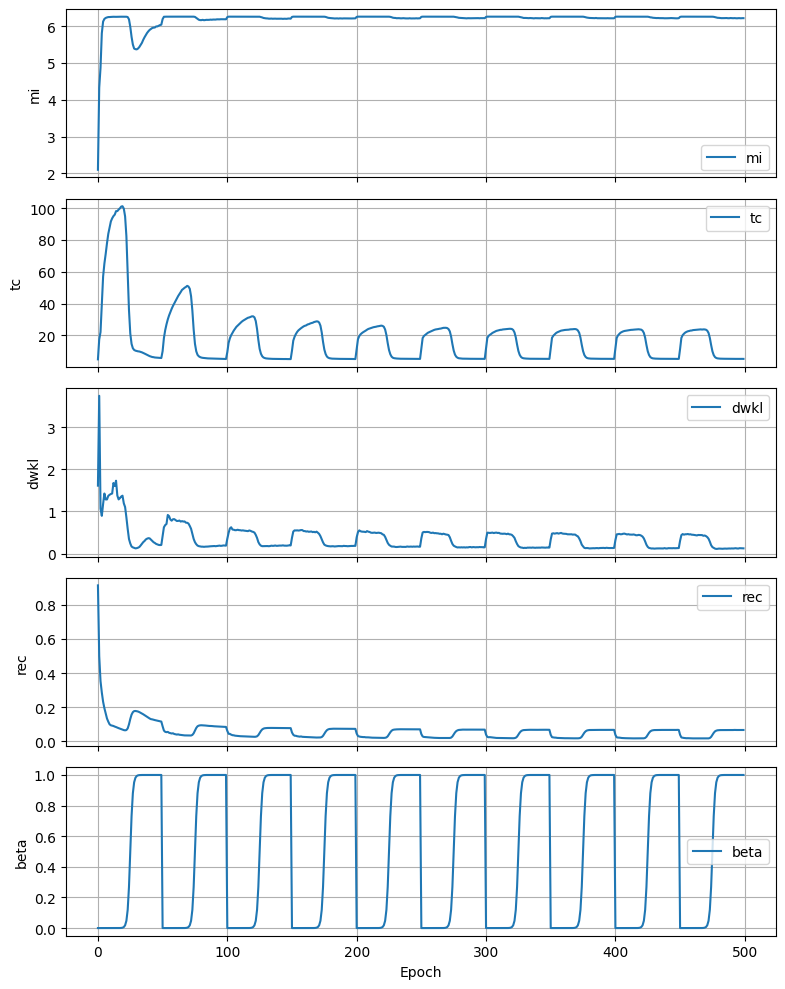

In [115]:
plot_metrics(df[df.version == "version_50"])

In [135]:
df_pareto.sort_values("rec").head(50)

,beta,dwkl,epoch,kld,loss,mi,rec,saved,step,tc,version,L,activation,baseline,batch_size,cyclical,cyclical_annealing,dwkl_weight,encoding,latent_dim,lr,mi_weight,mode,mss,num_epochs,num_workers,optimizer,rec_weight,shape,tc_weight,total_steps,tc_group
22900,0.500000,0.154223,475,0.164031,tcvae,6.257805,0.037342,1.0,18563,9.997423,version_50,3,elu,0,524,True,True,1.0,True,100,0.0001,0,normal,True,500,8,Adam,100,logistic,1,50,9.0
31900,0.500000,0.155850,475,0.109565,tcvae,6.257787,0.037560,1.0,18563,9.975168,version_86,3,elu,0,524,True,True,1.0,True,150,0.0001,0,normal,True,500,8,Adam,100,logistic,1,50,9.0
32850,0.500000,0.409489,425,0.332516,tcvae,6.257804,0.037813,1.0,16613,9.948631,version_13,3,elu,0,524,True,True,0.1,True,50,0.0001,0,normal,True,500,8,Adam,100,logistic,1,50,9.0
28850,0.500000,0.145285,425,0.154451,tcvae,6.256092,0.040375,1.0,16613,9.068301,version_68,3,elu,0,524,True,True,1.0,True,100,0.001,0,normal,True,500,8,Adam,100,logistic,1,50,9.0
34250,0.500000,0.418126,325,0.156618,tcvae,6.256131,0.040540,1.0,12713,8.982934,version_67,3,elu,0,524,True,True,0.1,True,100,0.001,0,normal,True,500,8,Adam,100,logistic,1,50,8.0
33897,0.047426,0.418521,472,0.312113,tcvae,6.258012,0.044082,1.0,18446,8.899115,version_34,3,elu,0,524,True,True,0.1,True,50,0.001,0,normal,True,500,8,Adam,100,logistic,10,50,8.0
17297,0.047426,0.871597,372,0.158466,tcvae,6.257980,0.046051,1.0,14546,8.731350,version_69,3,elu,0,524,True,True,0.01,True,100,0.001,0,normal,True,500,8,Adam,100,logistic,10,50,8.0
25397,0.047426,0.464828,472,0.154584,tcvae,6.256460,0.046318,1.0,18446,8.731337,version_70,3,elu,0,524,True,True,0.1,True,100,0.001,0,normal,True,500,8,Adam,100,logistic,10,50,8.0
15901,0.731058,0.575984,476,0.099599,tcvae,6.254484,0.047283,1.0,18602,8.122953,version_85,3,elu,0,524,True,True,0.1,True,150,0.0001,0,normal,True,500,8,Adam,100,logistic,1,50,8.0
42901,0.731058,2.405908,476,0.110287,tcvae,6.252512,0.048685,1.0,18602,7.896147,version_84,3,elu,0,524,True,True,0.01,True,150,0.0001,0,normal,True,500,8,Adam,100,logistic,1,50,7.0


In [136]:
version = 13
tc = "9_10"

#def load_model_and_create_data(version, kld, path = PATH):
VERSION = f"/version_{version}/"
FOLDER = f"res_v_{version}_" + tc
EPOCH_NAME = f"v_{version}-{tc}"

dm, model = load_data_and_model(path = PATH + VERSION, model_name="model_tc_" + tc + ".pth")
df_real = dm.dataset.df_test_scaled.iloc[:,:519]
df_labels = dm.dataset.df_test_scaled[["age", "sex", "bmi"]]
column_names = df_real.columns.astype("float").values
split_index = dm.dataset.df_test_scaled["test_set"].values

Loaded hyperparameters: {'L': 3, 'activation': 'elu', 'baseline': 0, 'batch_size': 524, 'cyclical': True, 'cyclical_annealing': True, 'dwkl_weight': 0.1, 'encoding': True, 'latent_dim': 50, 'loss': 'tcvae', 'lr': 0.0001, 'mi_weight': 0, 'mode': 'normal', 'mss': True, 'num_epochs': 500, 'num_workers': 8, 'optimizer': 'Adam', 'rec_weight': 100, 'shape': 'logistic', 'tc_weight': 1, 'total_steps': 50}


# MIG estimator

In [138]:
from utils_analysis.MIG import MIG

In [139]:
balanced_df = dm.dataset.df_mig_test_scaled

In [140]:
#balanced_df[["age_group", "sex", "bmi_group"]].hist()
#for i in balanced_df.age_group.unique():
#    balanced_df.loc[balanced_df.age_group == i, ["age_group", "sex", "bmi_group"]].hist()

In [141]:
estimator = MIG()

<class 'torch.Tensor'>


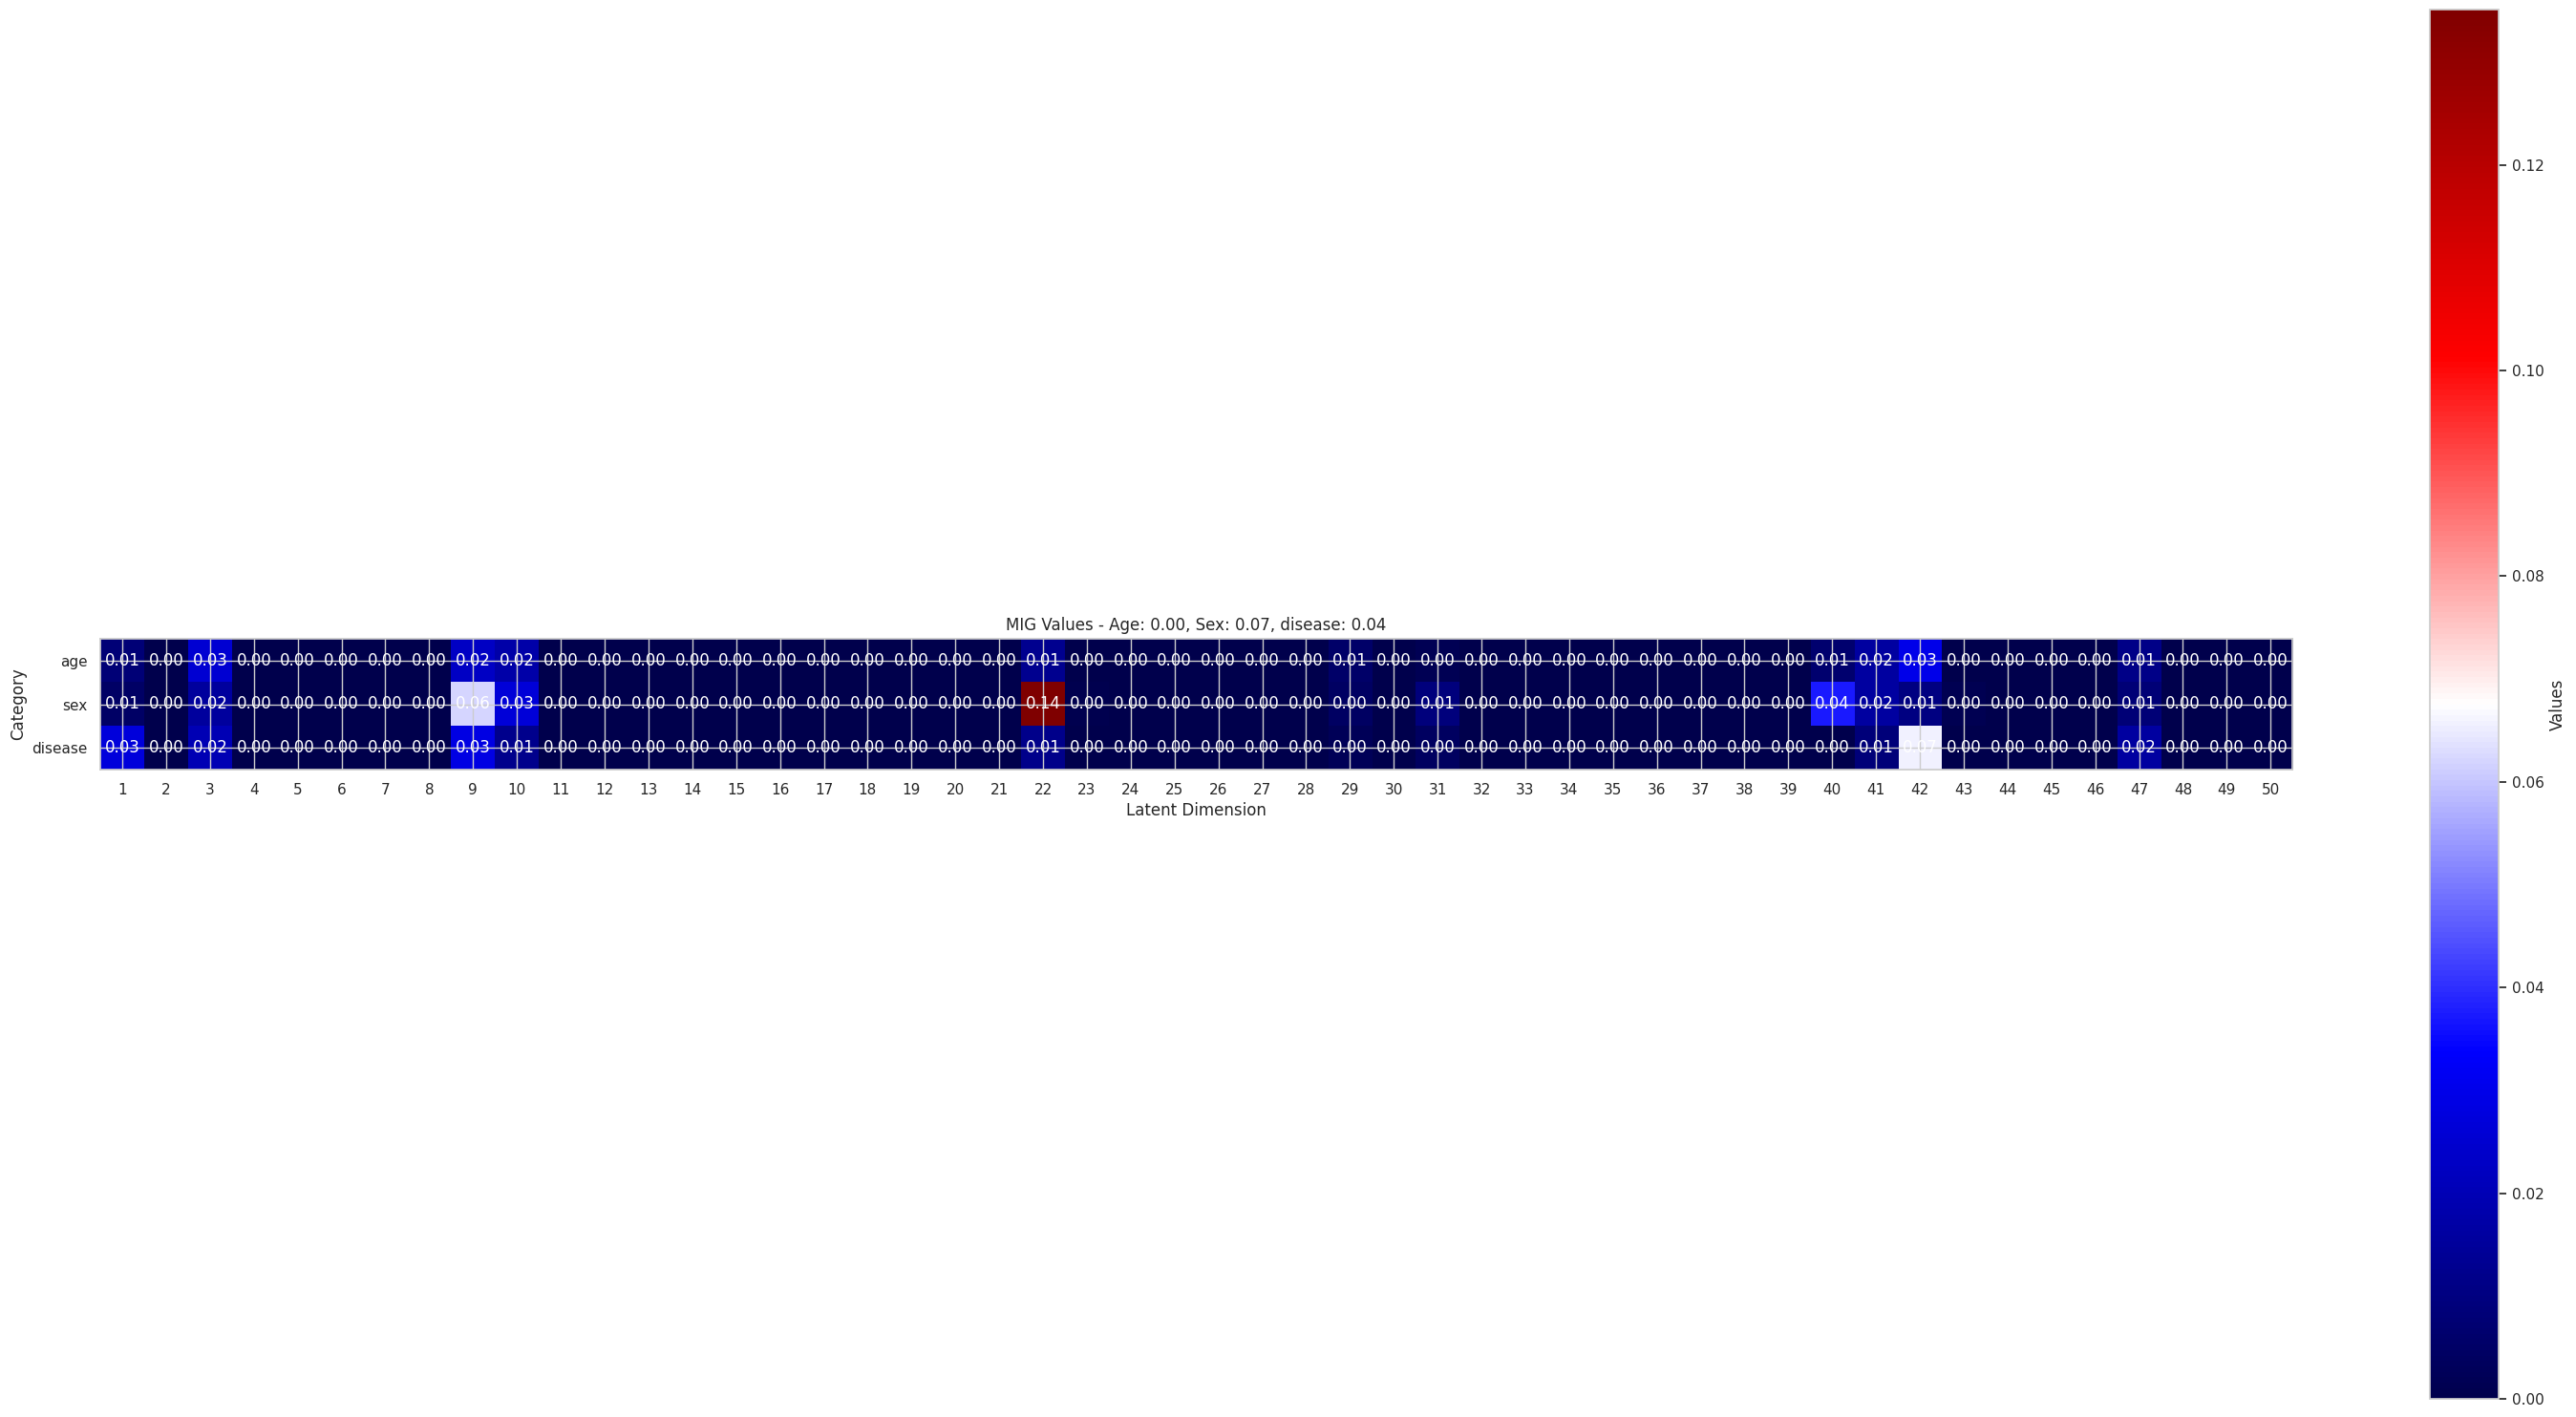

In [142]:
mi_normed, mig, mean_mig  = estimator.estimate_MIG(
    model = model,
    df_balanced = balanced_df.iloc[:,:519],
    df_labels = balanced_df[["age_group", "sex", "bmi_group"]],
    plot_mi_latents=True)

In [104]:
mi_normed.idxmax()

AttributeError: 'Tensor' object has no attribute 'idxmax'